Distribution of Scores

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

eq5d=pd.read_csv('rq1_cleaned_no_ae.csv')




In [2]:
scores=pd.read_excel('../data/Scores 6 Jan 2025_Prescribed_Completed Baseline PROMs.xlsx')
gad7=scores[scores['promName']=='GAD7']
gad7=gad7[['SID','Round','promName','total_score','completionDate']]


gad7_wide = gad7.pivot_table(index='SID', 
                                    columns='Round', 
                                    values='total_score', 
                                    aggfunc='first')

gad7_wide.columns = [f"GAD7_Round{r}" for r in gad7_wide.columns]
gad7_wide = gad7_wide.reset_index()
gad7= pd.merge(eq5d, gad7_wide, on='SID', how='left')
gad7=gad7.rename(columns={'GAD7_Round1_y': 'GAD7_Round1',})

In [44]:
insomnia=scores[scores['promName']=='insomniaEfficacyMeasure']
insomnia=insomnia[['SID','Round','promName','total_score','completionDate']]


insomnia_wide = insomnia.pivot_table(index='SID', 
                                    columns='Round', 
                                    values='total_score', 
                                    aggfunc='first')

insomnia_wide.columns = [f"insomniaEfficacyMeasure_Round{r}" for r in insomnia_wide.columns]
insomnia_wide = insomnia_wide.reset_index()
insomnia_wide= pd.merge(gad7, insomnia_wide, on='SID', how='left')
insomnia=insomnia_wide.rename(columns={'insomniaEfficacyMeasure_Round1_y': 'insomniaEfficacyMeasure_Round1',})
full=insomnia.copy()


In [45]:
full.columns.tolist()

['SID',
 'EQ5D_Round1',
 'EQ5D_Round2',
 'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'Age',
 'Sex',
 'occupation',
 'weight',
 'height',
 'Myocardial_infarction',
 'Congestive_heart_failure',
 'Peripheral_vascular_disease',
 'Cerebrovascular_accident_or_transient_ischemic_attack',
 'Dementia',
 'Chronic_obstructive_pulmonary_disease',
 'Connective_tissue_disease',
 'Peptic_Ulcer_Disease',
 'Liver_disease',
 'Diabetes',
 'Hemiplegia',
 'Moderate_to_severe_chronic_kidney_disease',
 'Solid_tumour',
 'Leukemia',
 'Lymphoma',
 'AIDS',
 'Charlson_comorbidity',
 'Hypertension',
 'Depression_or_anxiety',
 'Arthritis',
 'Epilepsy',
 'VTE',
 'Endocrine_thyroid_dysfunction',
 'Allergy',
 'Smoking_status',
 'Smoking_pack_years',
 'alcohol_units',
 'Cannabis_status',
 'GAD7_Round1_x',
 'insomniaEfficacyMeasure_Round1_x',
 'diag_Depression',
 'diag_Anxiety',
 'diag_Chronic pain',
 'diag_Osteoarthritis',
 'diag_PTSD',
 'diag_Fibromyalgia',
 'diag_Multiple sclerosis',
 'diag_Neurop

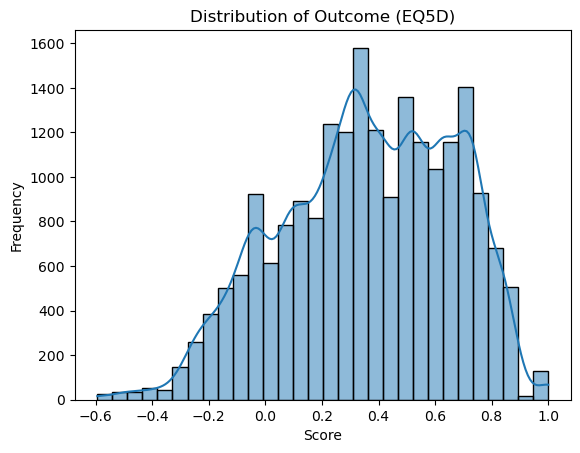

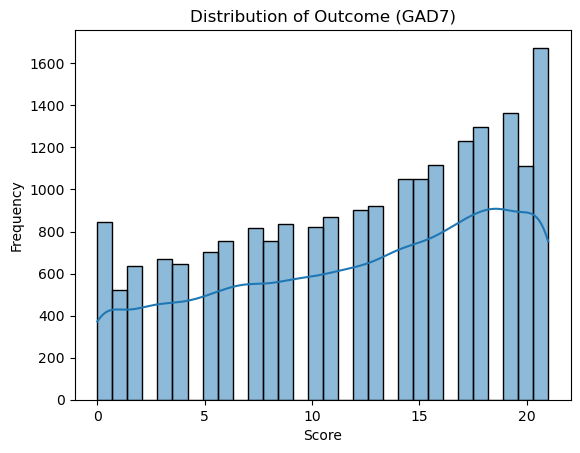

In [4]:
sns.histplot(eq5d['EQ5D_Round1'], kde=True, bins=30)
plt.title('Distribution of Outcome (EQ5D)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

sns.histplot(gad7['GAD7_Round1'], kde=True, bins=30)
plt.title('Distribution of Outcome (GAD7)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

Correlation Matrix of Predictors

In [6]:
eq5d.columns.tolist()

['SID',
 'EQ5D_Round1',
 'EQ5D_Round2',
 'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'Age',
 'Sex',
 'occupation',
 'weight',
 'height',
 'Myocardial_infarction',
 'Congestive_heart_failure',
 'Peripheral_vascular_disease',
 'Cerebrovascular_accident_or_transient_ischemic_attack',
 'Dementia',
 'Chronic_obstructive_pulmonary_disease',
 'Connective_tissue_disease',
 'Peptic_Ulcer_Disease',
 'Liver_disease',
 'Diabetes',
 'Hemiplegia',
 'Moderate_to_severe_chronic_kidney_disease',
 'Solid_tumour',
 'Leukemia',
 'Lymphoma',
 'AIDS',
 'Charlson_comorbidity',
 'Hypertension',
 'Depression_or_anxiety',
 'Arthritis',
 'Epilepsy',
 'VTE',
 'Endocrine_thyroid_dysfunction',
 'Allergy',
 'Smoking_status',
 'Smoking_pack_years',
 'alcohol_units',
 'Cannabis_status',
 'GAD7_Round1',
 'insomniaEfficacyMeasure_Round1',
 'diag_Depression',
 'diag_Anxiety',
 'diag_Chronic pain',
 'diag_Osteoarthritis',
 'diag_PTSD',
 'diag_Fibromyalgia',
 'diag_Multiple sclerosis',
 'diag_Neuropathi

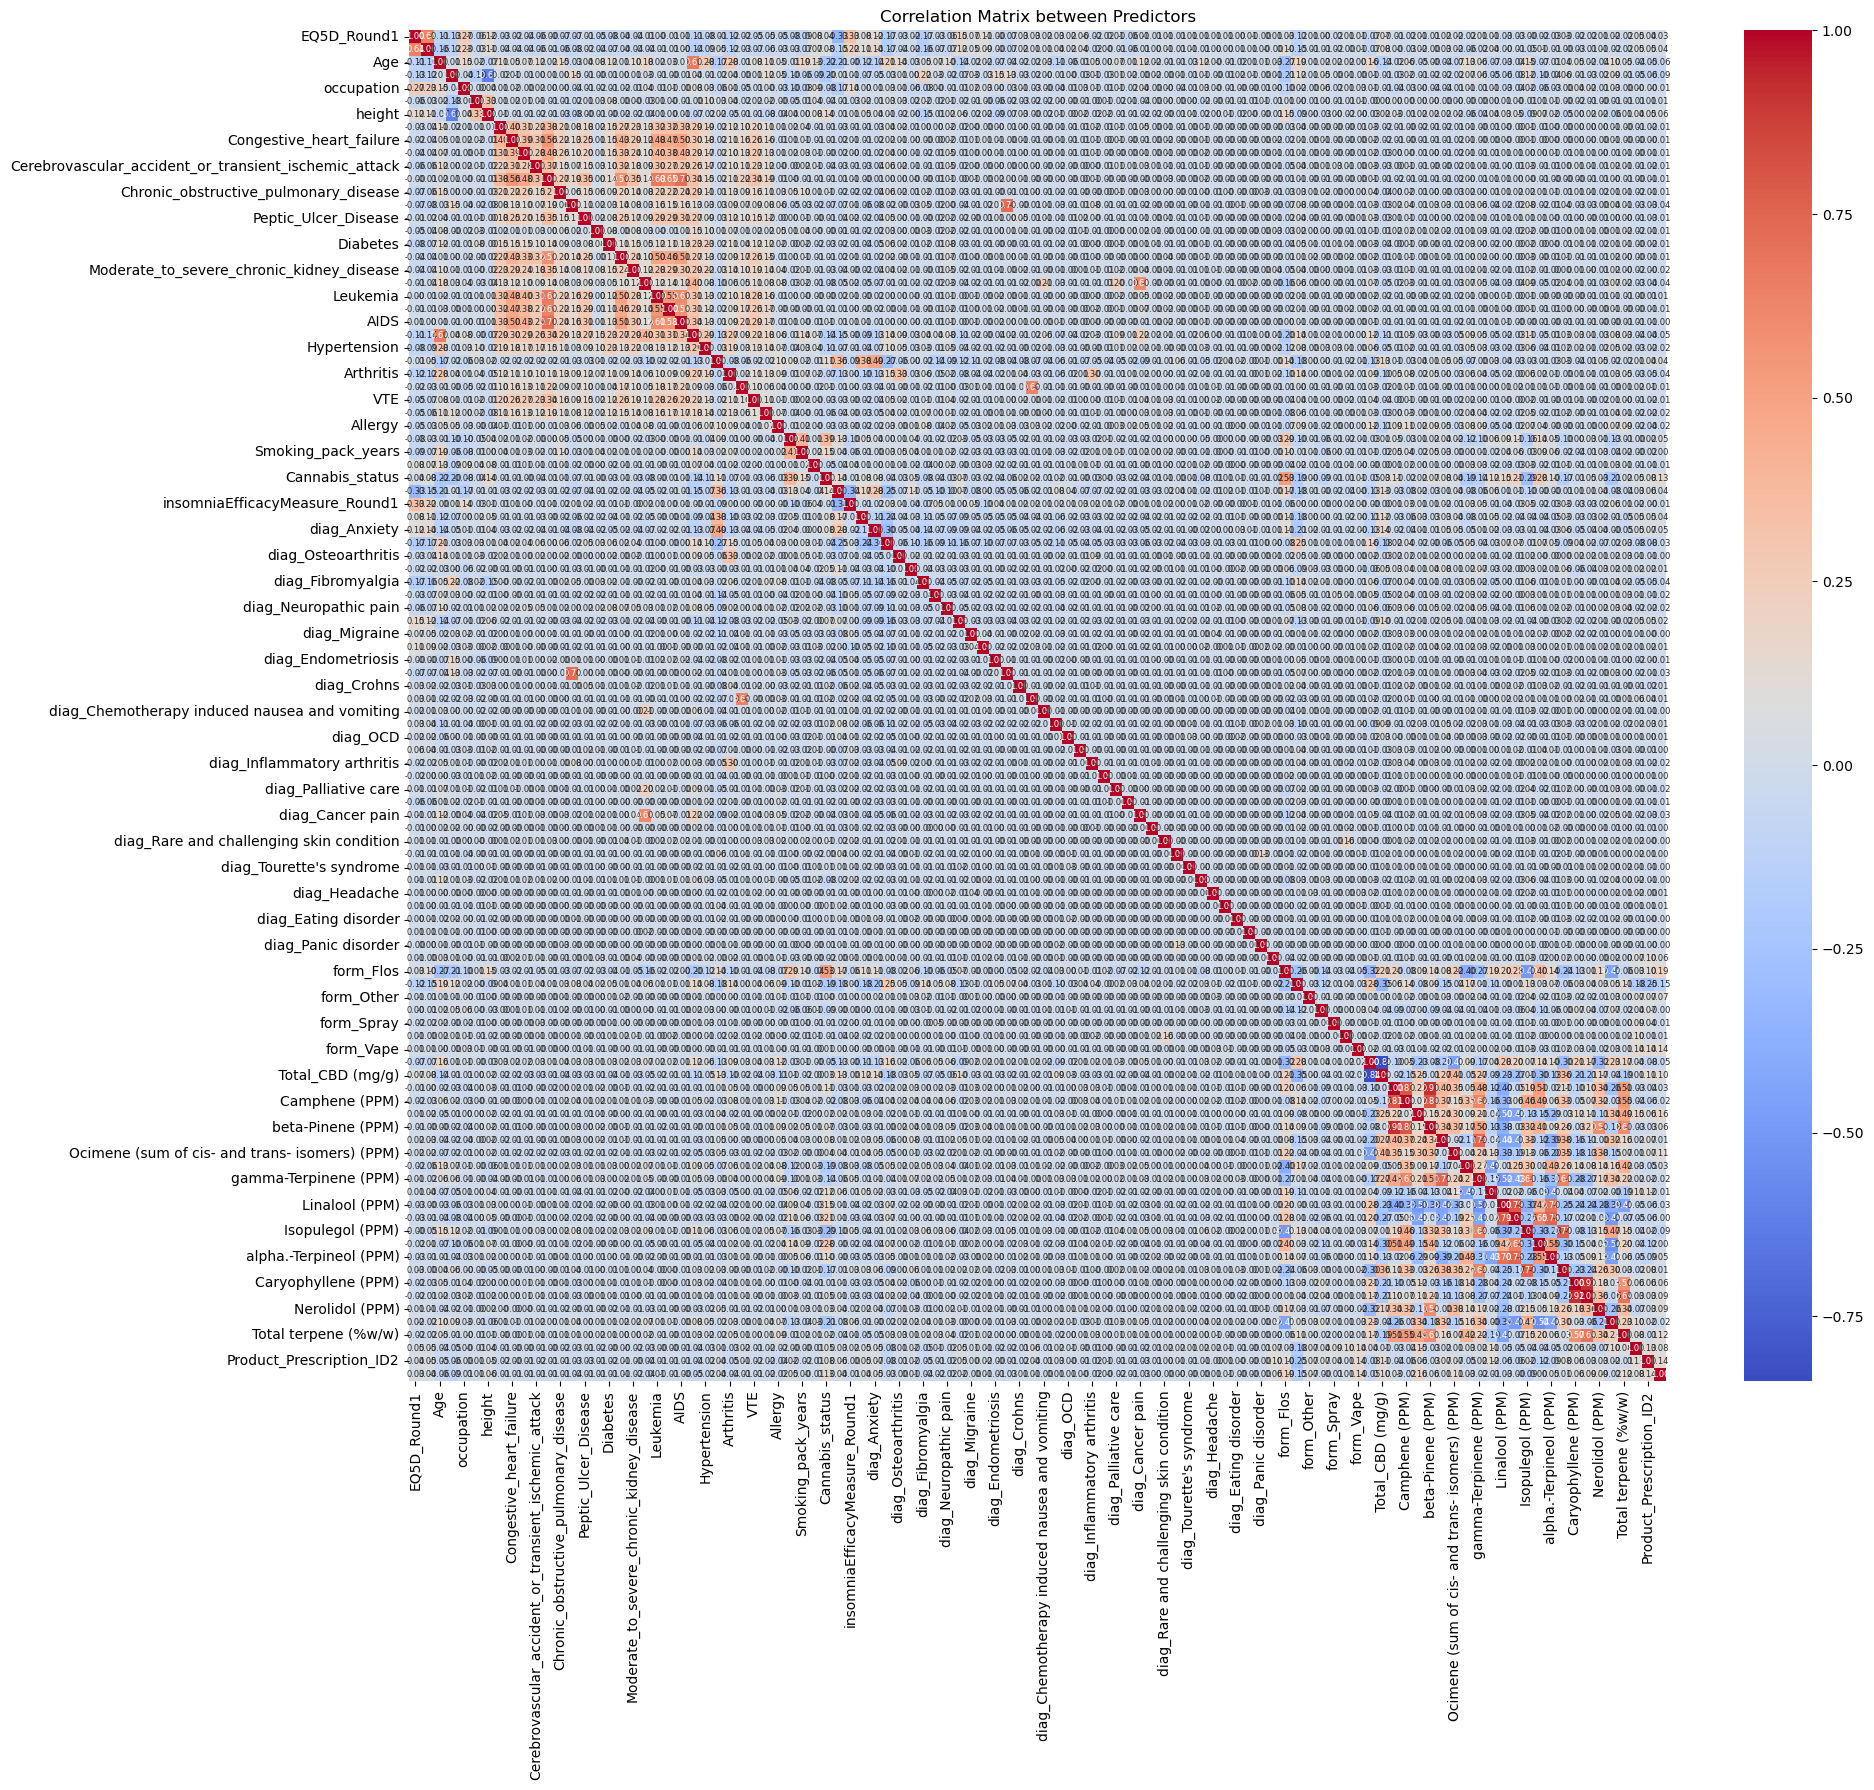

In [3]:
# Remove follow up scores
eq5d_predictors = eq5d.drop(columns=['SID',
 'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6'])

# Calculate correlation matrix between predictors
eq5d_corr_matrix = eq5d_predictors.corr()

plt.figure(figsize=(20, 18))  

sns.heatmap(
    eq5d_corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    annot_kws={"size": 6}  
)

plt.xticks(rotation=90) 
plt.yticks(rotation=0)  
plt.title('Correlation Matrix between Predictors')
plt.tight_layout()
plt.show()


c:\Users\abbyh\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\abbyh\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


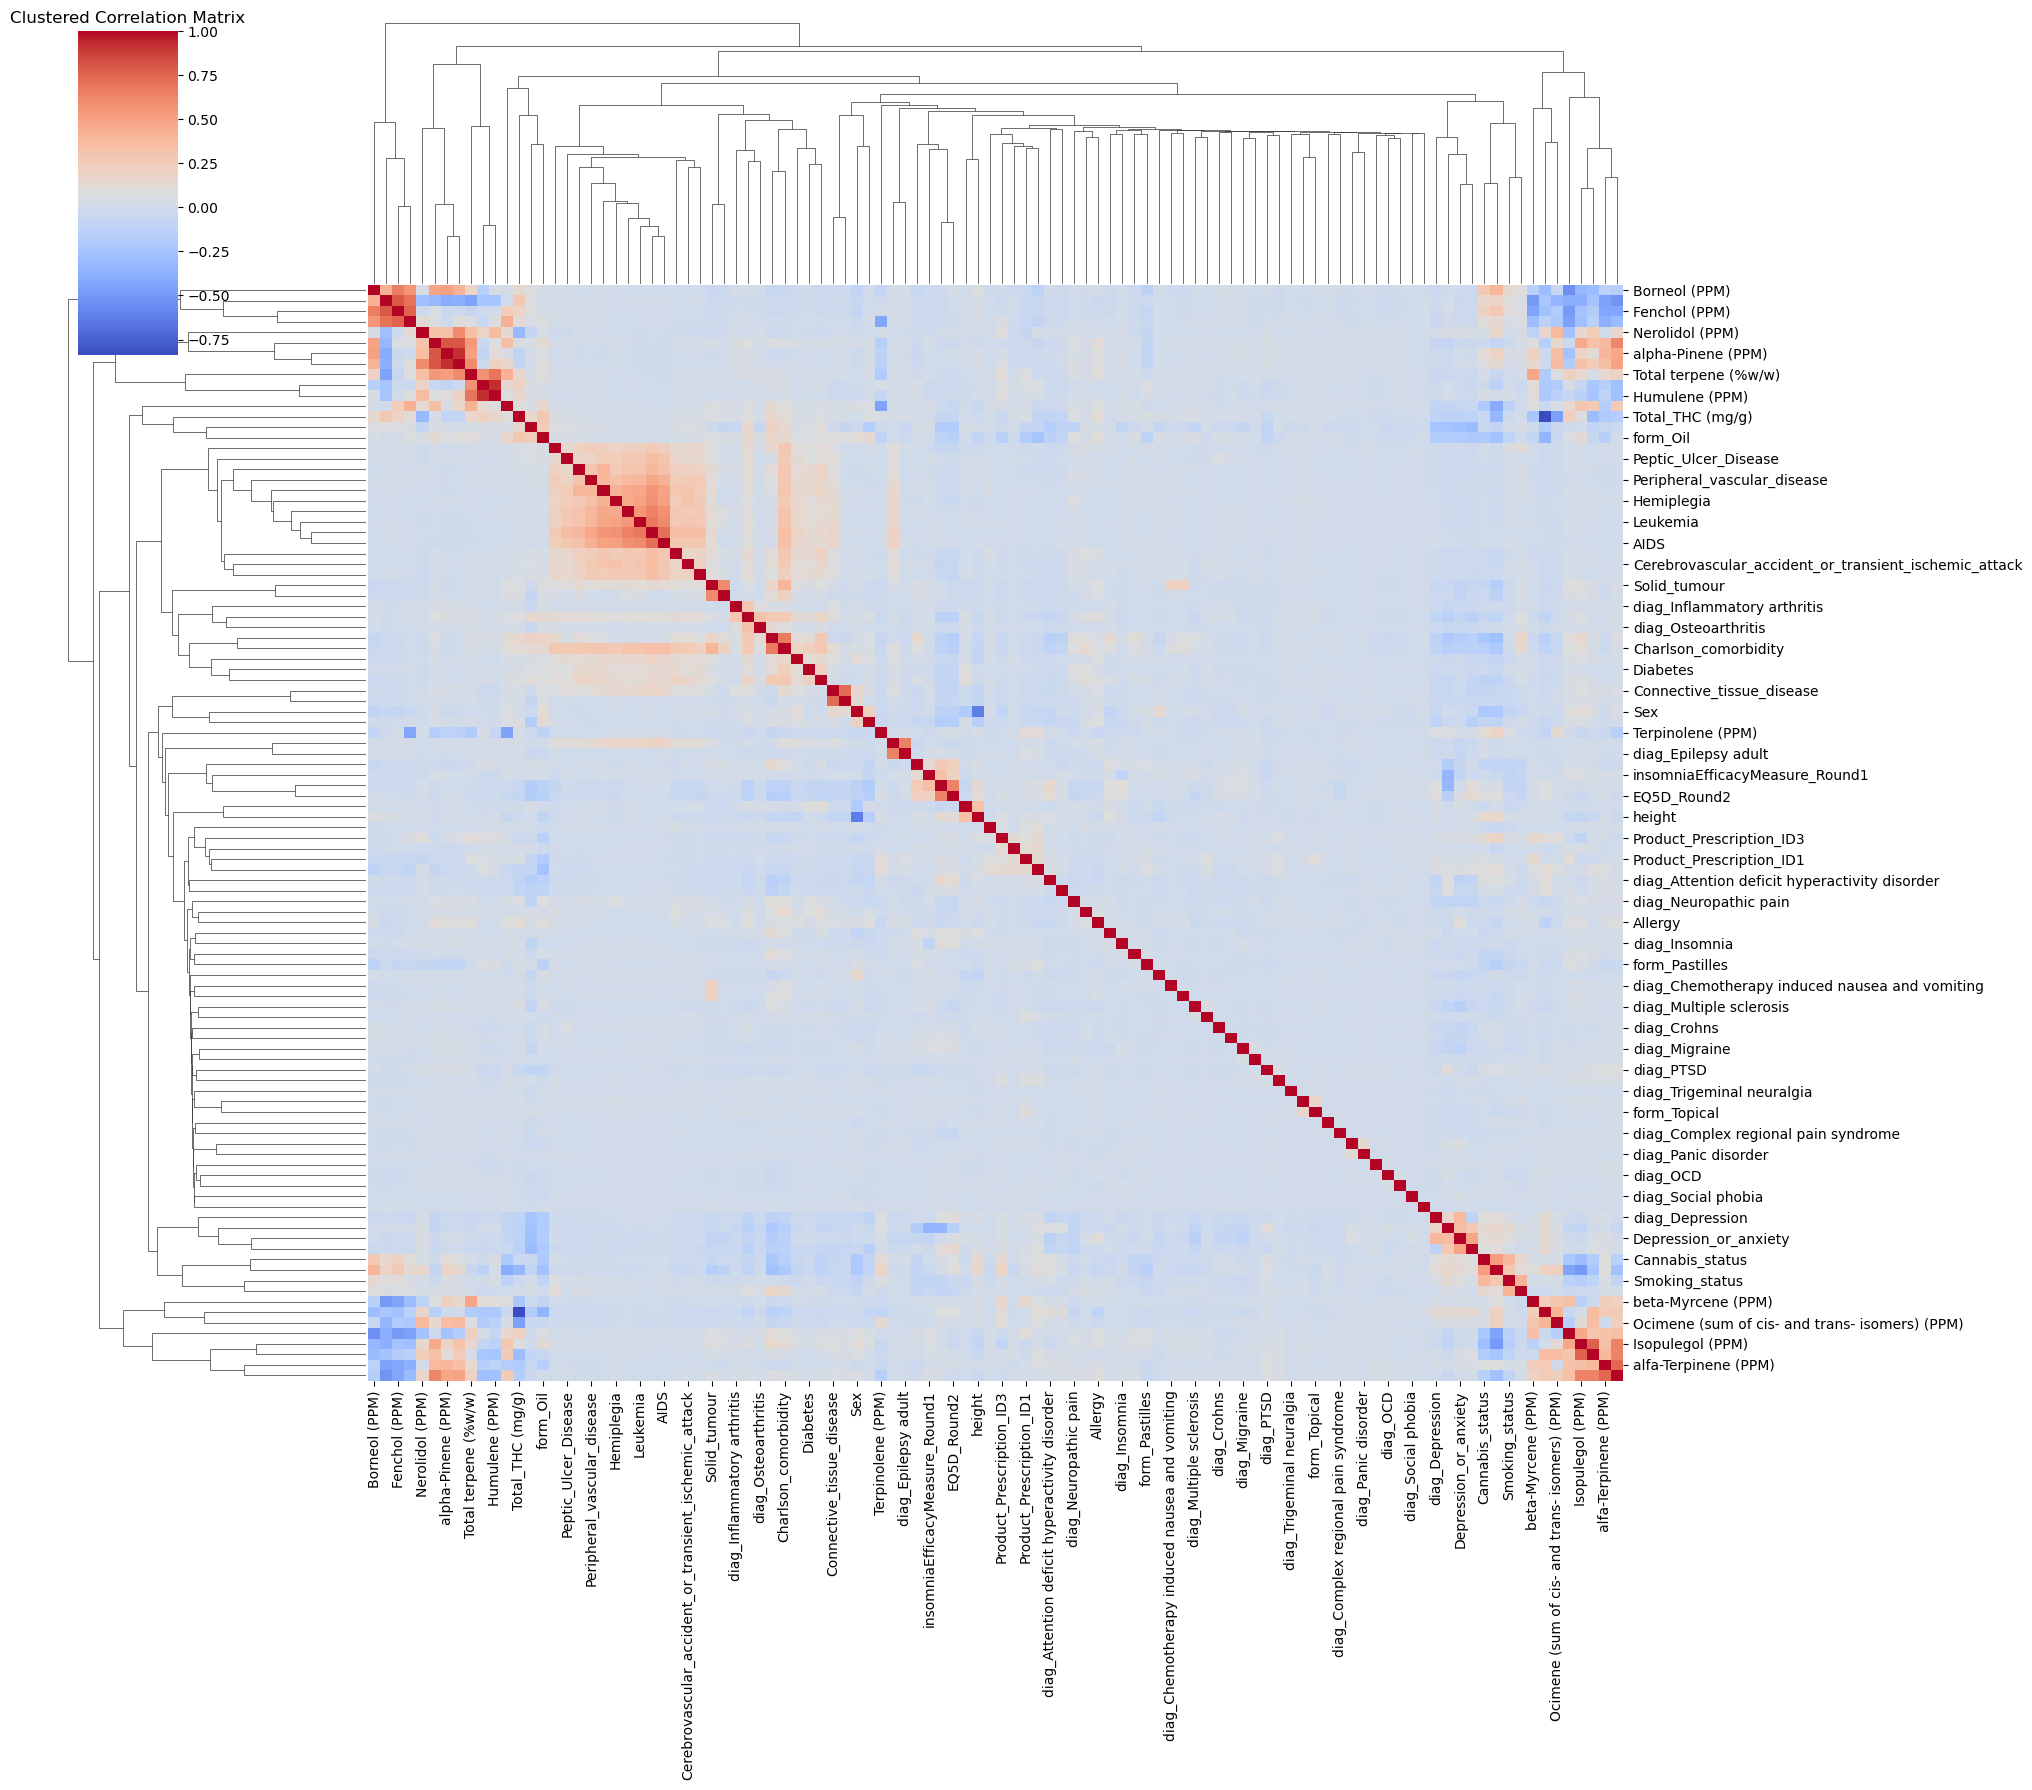

In [4]:
sns.clustermap(
    eq5d_corr_matrix,
    cmap='coolwarm',
    figsize=(20, 18)
)
plt.title('Clustered Correlation Matrix')
plt.show()


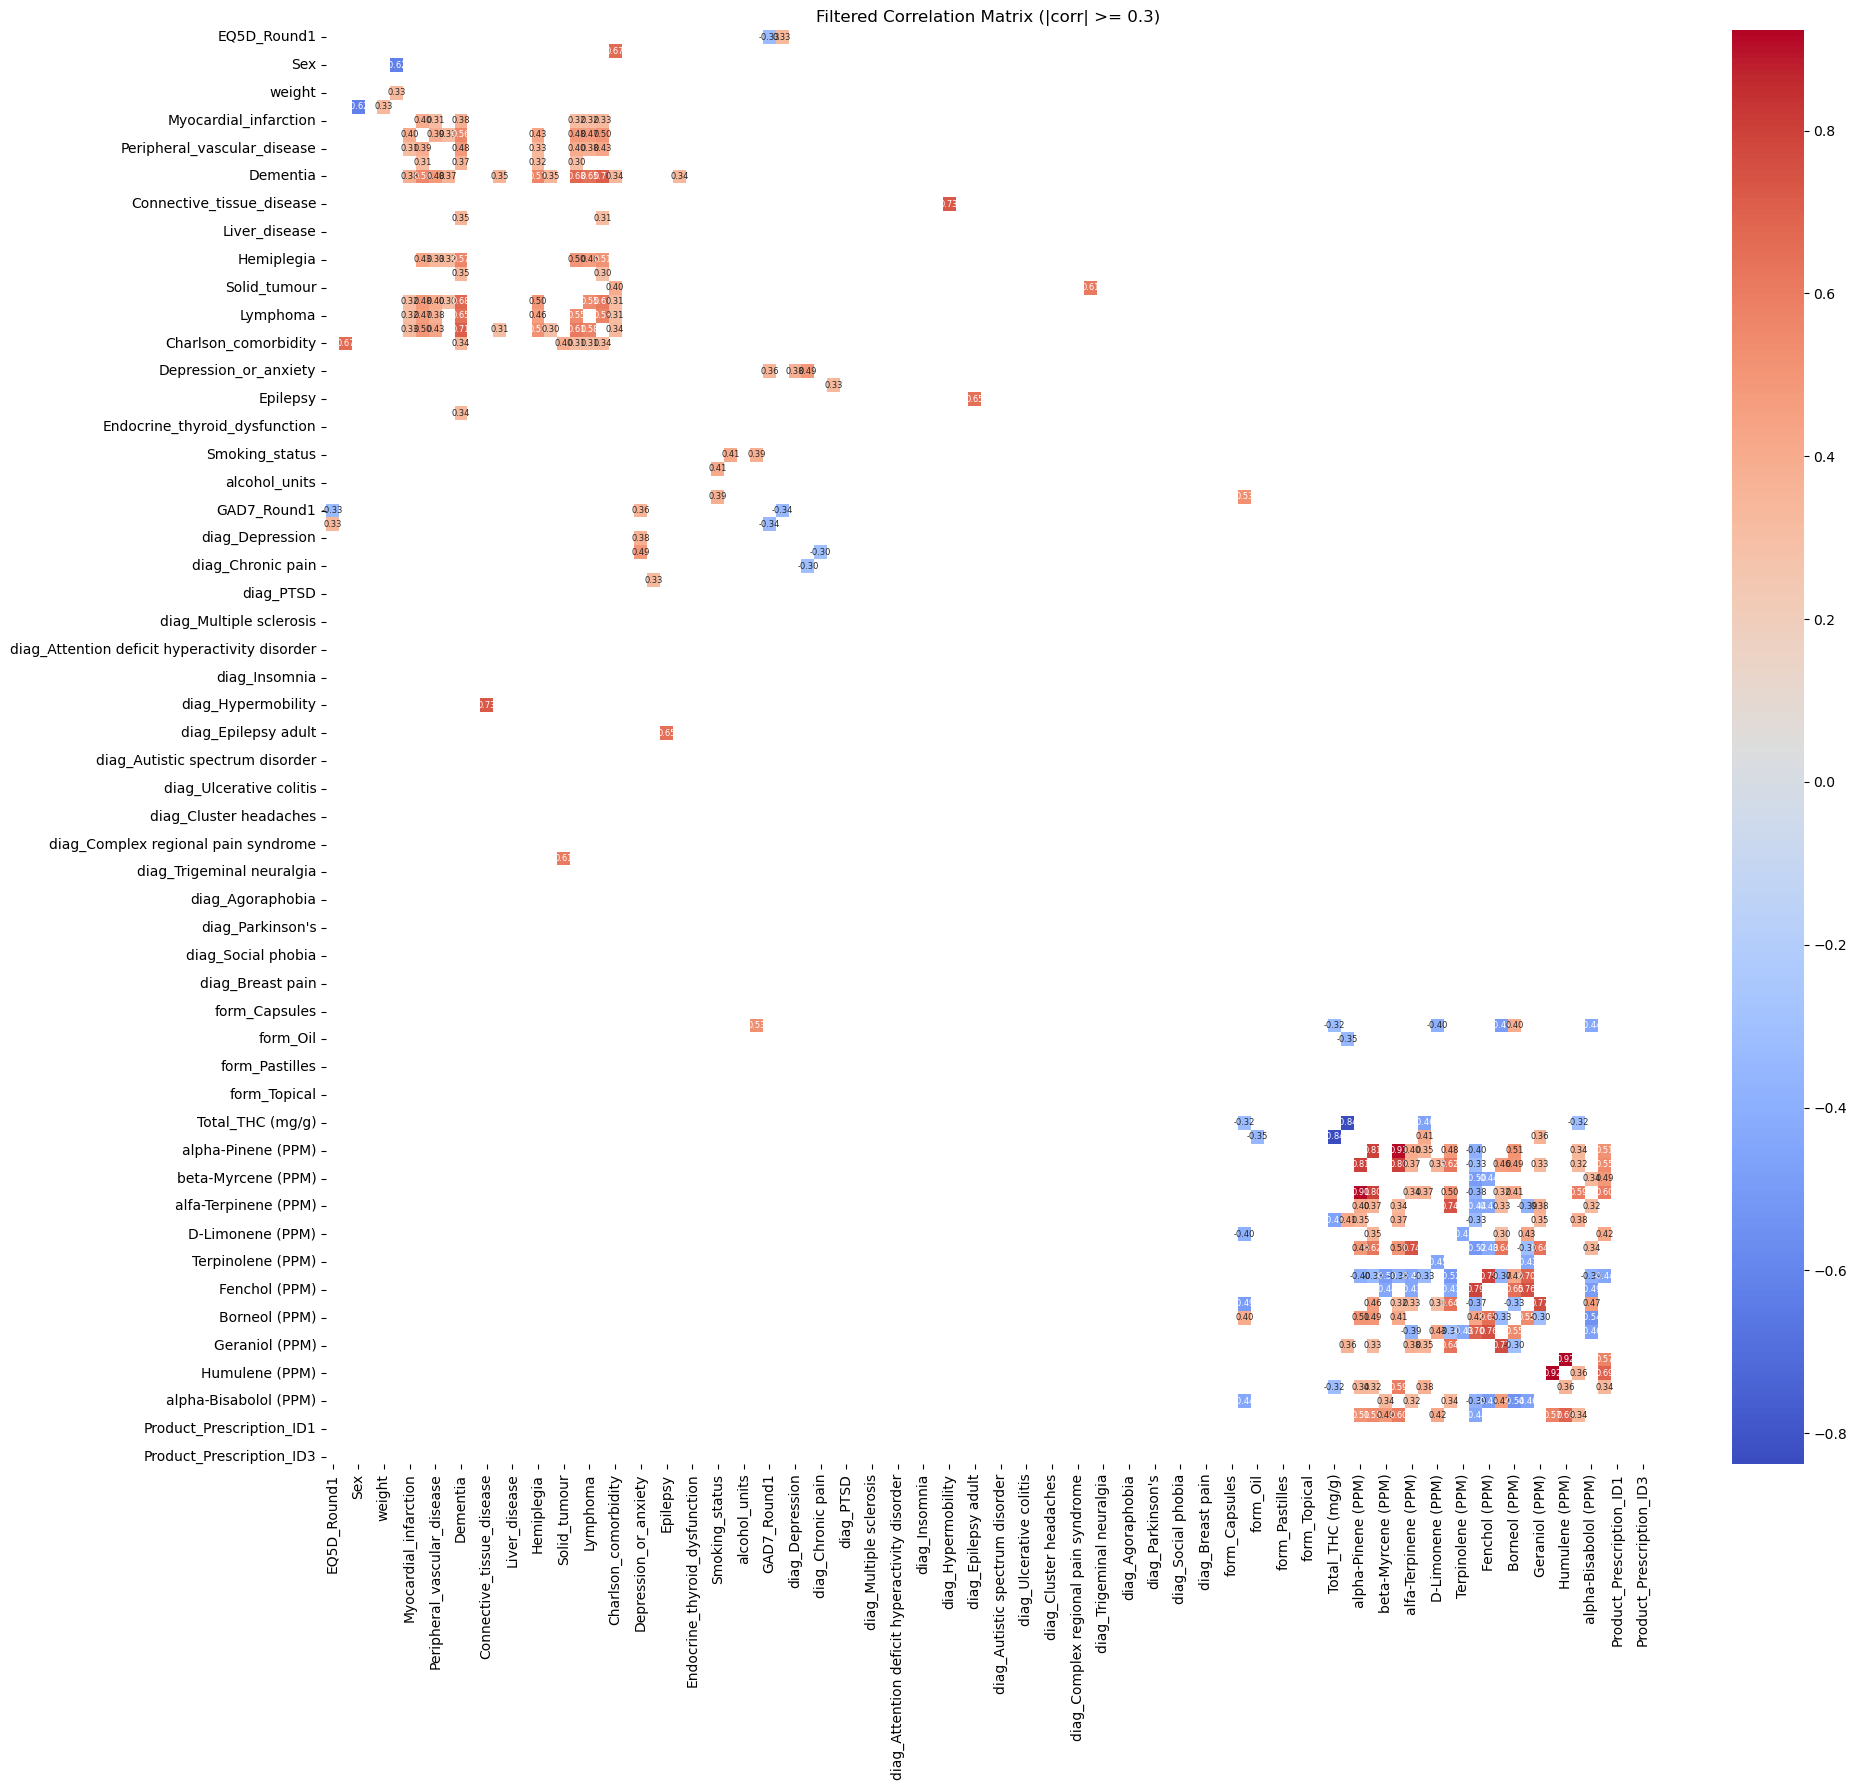

In [ ]:
import numpy as np

threshold = 0.3
filtered_corr = eq5d_corr_matrix.where(np.abs(eq5d_corr_matrix) >= threshold)

np.fill_diagonal(filtered_corr.values, np.nan)

plt.figure(figsize=(20, 18))

sns.heatmap(
    filtered_corr,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    annot_kws={"size": 6},
    mask=filtered_corr.isnull()  # hide NaN
)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title(f'Filtered Correlation Matrix (|corr| >= {threshold})')
plt.tight_layout()
plt.show()



Correlation between Predictors and Outcomes

In [52]:
eq5d_predictors = full.drop(columns=['SID','GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'insomniaEfficacyMeasure_Round3',
 'insomniaEfficacyMeasure_Round4',
 'insomniaEfficacyMeasure_Round5',
 'insomniaEfficacyMeasure_Round6',
 'insomniaEfficacyMeasure_Round7',
 'insomniaEfficacyMeasure_Round8',
 'insomniaEfficacyMeasure_Round9',
 'insomniaEfficacyMeasure_Round10',
 'insomniaEfficacyMeasure_Round11',
 'insomniaEfficacyMeasure_Round12',
 'insomniaEfficacyMeasure_Round13','insomniaEfficacyMeasure_Round1_x','GAD7_Round1_x'])
eq5d_cor= eq5d_predictors.corr()['EQ5D_Round3'].drop('EQ5D_Round3')
print(eq5d_cor.sort_values(ascending=False))

EQ5D_Round2                       0.739630
EQ5D_Round1                       0.621733
insomniaEfficacyMeasure_Round2    0.318063
occupation                        0.255513
insomniaEfficacyMeasure_Round1    0.202741
                                    ...   
form_Oil                         -0.144969
Age                              -0.145361
diag_Fibromyalgia                -0.169699
diag_Chronic pain                -0.170947
GAD7_Round2                      -0.358860
Name: EQ5D_Round3, Length: 106, dtype: float64


In [54]:
## Absolute Value Correlation with Outcome
eq5d_cor= eq5d_predictors.corr()['EQ5D_Round3'].drop('EQ5D_Round3')

# Turn into DataFrame, with absolute value for sorting
corr_df = eq5d_cor.to_frame(name='Correlation')
corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()

# Sort by absolute correlation (recommended!)
corr_df = corr_df.sort_values(by='Abs_Correlation', ascending=False)

# Reset index to make predictor names a column
corr_df = corr_df.reset_index().rename(columns={'index': 'Predictor'})

eq5d_corr = corr_df
print(eq5d_corr)


                                         Predictor  Correlation  \
0                                      EQ5D_Round2     0.739630   
1                                      EQ5D_Round1     0.621733   
2                                      GAD7_Round2    -0.358860   
3                   insomniaEfficacyMeasure_Round2     0.318063   
4                                       occupation     0.255513   
..                                             ...          ...   
101  diag_Chemotherapy induced nausea and vomiting     0.004533   
102                                       Lymphoma     0.004441   
103                                     form_Other     0.003435   
104                             diag_Social phobia     0.003338   
105                           diag_Eating disorder     0.001947   

     Abs_Correlation  
0           0.739630  
1           0.621733  
2           0.358860  
3           0.318063  
4           0.255513  
..               ...  
101         0.004533  
102        

In [55]:
## Absolute Value Correlation with Outcome (GAD7)

gad7_predictors = full.drop(columns=['SID',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x',
  'insomniaEfficacyMeasure_Round3',
 'insomniaEfficacyMeasure_Round4',
 'insomniaEfficacyMeasure_Round5',
 'insomniaEfficacyMeasure_Round6',
 'insomniaEfficacyMeasure_Round7',
 'insomniaEfficacyMeasure_Round8',
 'insomniaEfficacyMeasure_Round9',
 'insomniaEfficacyMeasure_Round10',
 'insomniaEfficacyMeasure_Round11',
 'insomniaEfficacyMeasure_Round12',
 'insomniaEfficacyMeasure_Round13','insomniaEfficacyMeasure_Round1_x','GAD7_Round1_x'])
gad7_cor= gad7_predictors.corr()['GAD7_Round3'].drop('GAD7_Round3')

# Turn into DataFrame, with absolute value for sorting
corr_df = gad7_cor.to_frame(name='Correlation')
corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()

# Sort by absolute correlation (recommended!)
corr_df = corr_df.sort_values(by='Abs_Correlation', ascending=False)

# Reset index to make predictor names a column
corr_df = corr_df.reset_index().rename(columns={'index': 'Predictor'})
gad7_corr = corr_df
print(gad7_corr)

                          Predictor  Correlation  Abs_Correlation
0                       GAD7_Round2     0.695427         0.695427
1                       GAD7_Round1     0.489684         0.489684
2                       EQ5D_Round2    -0.409742         0.409742
3    insomniaEfficacyMeasure_Round2    -0.374051         0.374051
4                       EQ5D_Round1    -0.297631         0.297631
..                              ...          ...              ...
101                      form_Other     0.000619         0.000619
102                      Hemiplegia    -0.000524         0.000524
103               Terpinolene (PPM)    -0.000310         0.000310
104             Caryophyllene (PPM)    -0.000267         0.000267
105                        Diabetes    -0.000074         0.000074

[106 rows x 3 columns]


Univariate Analysis (EQ5D)

In [33]:
print(eq5d_top)

0                       EQ5D_Round1
1                        occupation
2    insomniaEfficacyMeasure_Round1
3                 diag_Chronic pain
4                 diag_Fibromyalgia
Name: Predictor, dtype: object


In [58]:
import statsmodels.api as sm
eq5d_top = eq5d_corr['Predictor'].head(10)

univariate_eq5d = []

for predictor in eq5d_top:
    X = full[[predictor, 'EQ5D_Round3']].dropna()
    X_const = sm.add_constant(X[predictor])
    y = X['EQ5D_Round3']
    model = sm.OLS(y, X_const).fit()

    result = {
        'Predictor': predictor,
        'Beta Coefficient': model.params[predictor],
        'p-val': model.pvalues[predictor],
        'R-squared': model.rsquared
    }
    univariate_eq5d.append(result)


univariate_eq5d_df = pd.DataFrame(univariate_eq5d)
print(univariate_eq5d_df)


                        Predictor  Beta Coefficient          p-val  R-squared
0                     EQ5D_Round2          0.744308   0.000000e+00   0.547052
1                     EQ5D_Round1          0.555548   0.000000e+00   0.386552
2                     GAD7_Round2         -0.018366   0.000000e+00   0.128781
3  insomniaEfficacyMeasure_Round2          0.034820   0.000000e+00   0.101164
4                      occupation          0.130520  1.735918e-241   0.065287
5  insomniaEfficacyMeasure_Round1          0.025933  8.794437e-151   0.041104
6               diag_Chronic pain         -0.103789  3.227463e-107   0.029223
7               diag_Fibromyalgia         -0.162694  1.154971e-105   0.028798
8                             Age         -0.003258   9.676922e-78   0.021130
9                        form_Oil         -0.088172   2.507335e-77   0.021016


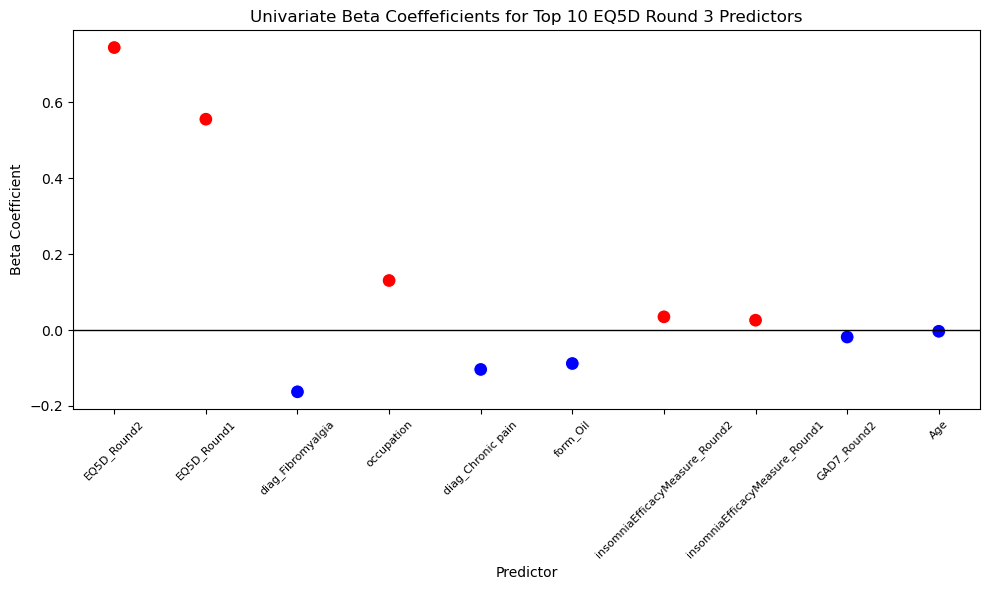

In [68]:
## plot for coefficients

# sorting by absolute value of beta coefficient

univariate_eq5d_df['Abs_Beta'] = univariate_eq5d_df['Beta Coefficient'].abs()
df_plot = univariate_eq5d_df.sort_values(by='Abs_Beta', ascending=False)
df_plot['col'] = df_plot['Beta Coefficient'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
palette = {'Positive': 'red', 'Negative': 'blue'}
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_plot,
    y='Beta Coefficient',
    x='Predictor',
    hue='col',
    palette=palette,
    s=100,
    legend=False
)

plt.axhline(y=0, color='black', linewidth=1)

plt.title('Univariate Beta Coeffeficients for Top 10 EQ5D Round 3 Predictors')
plt.xlabel('Predictor')
plt.xticks(fontsize=8,rotation=45)
plt.ylabel('Beta Coefficient')
plt.tight_layout()
plt.show()

Univariate Analysis (GAD7)

In [62]:
gad7_top = gad7_corr['Predictor'].head(10)

univariate_gad7 = []

for predictor in gad7_top:
    X = full[[predictor, 'GAD7_Round3']].dropna()
    X_const = sm.add_constant(X[predictor])
    y = X['GAD7_Round3']
    model = sm.OLS(y, X_const).fit()

    result = {
        'Predictor': predictor,
        'Beta Coefficient': model.params[predictor],
        'p-val': model.pvalues[predictor],
        'R-squared': model.rsquared
    }
    univariate_gad7.append(result)


univariate_gad7_df = pd.DataFrame(univariate_gad7)
print(univariate_gad7_df)

                        Predictor  Beta Coefficient          p-val  R-squared
0                     GAD7_Round2          0.677581   0.000000e+00   0.483619
1                     GAD7_Round1          0.396539   0.000000e+00   0.239790
2                     EQ5D_Round2         -7.848621   0.000000e+00   0.167888
3  insomniaEfficacyMeasure_Round2         -0.779351   0.000000e+00   0.139914
4                     EQ5D_Round1         -5.060819   0.000000e+00   0.088584
5  insomniaEfficacyMeasure_Round1         -0.499498  1.418970e-154   0.042099
6                      occupation         -1.910987  6.469498e-142   0.038642
7           Depression_or_anxiety          1.973035  2.248296e-134   0.036598
8                    diag_Anxiety          1.540303   1.454128e-55   0.014992
9                       diag_PTSD          2.716447   2.027838e-38   0.010239


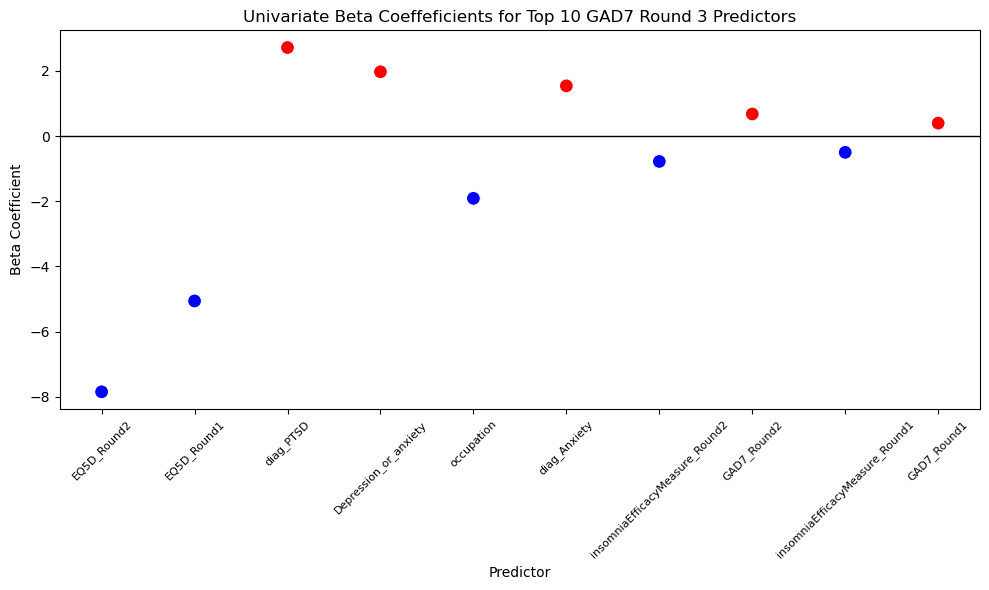

In [67]:
## plot for coefficients

# sorting by absolute value of beta coefficient

univariate_gad7_df['Abs_Beta'] = univariate_gad7_df['Beta Coefficient'].abs()
df_plot = univariate_gad7_df.sort_values(by='Abs_Beta', ascending=False)
df_plot['col'] = df_plot['Beta Coefficient'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
palette = {'Positive': 'red', 'Negative': 'blue'}
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_plot,
    y='Beta Coefficient',
    x='Predictor',
    hue='col',
    palette=palette,
    s=100,
    legend=False
)

plt.axhline(y=0, color='black', linewidth=1)

plt.title('Univariate Beta Coeffeficients for Top 10 GAD7 Round 3 Predictors')
plt.xlabel('Predictor')
plt.xticks(fontsize=8,rotation=45)
plt.ylabel('Beta Coefficient')
plt.tight_layout()
plt.show()

Assumptions Checking

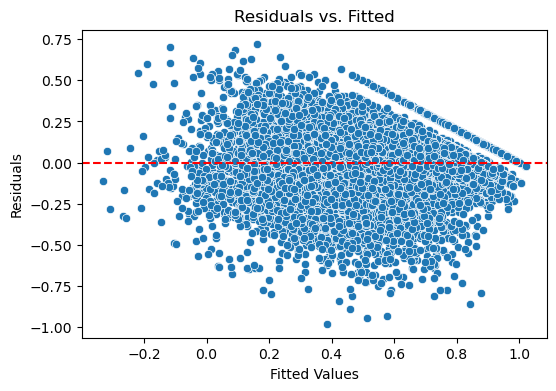

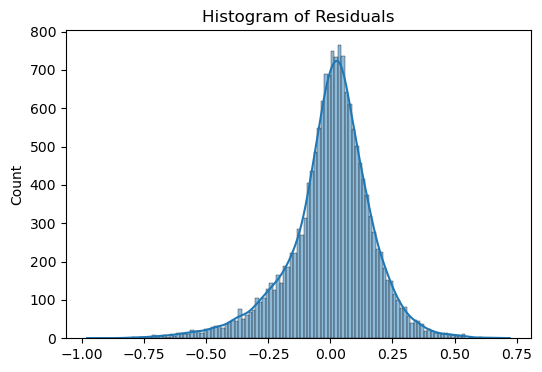

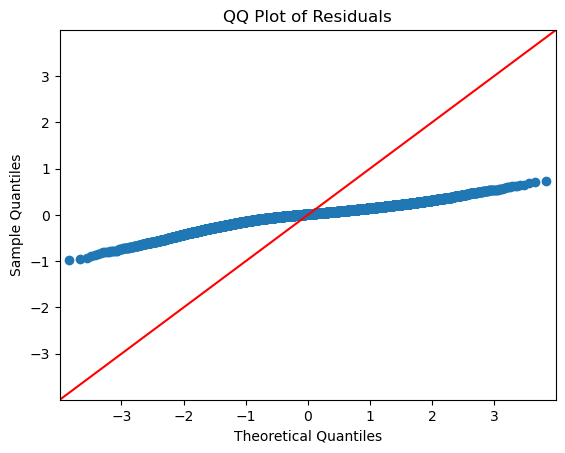

Predictions below min EQ5D: 0
Predictions above max EQ5D: 7


In [69]:
X = full.drop(columns=['SID','GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x',
  'insomniaEfficacyMeasure_Round3',
 'insomniaEfficacyMeasure_Round4',
 'insomniaEfficacyMeasure_Round5',
 'insomniaEfficacyMeasure_Round6',
 'insomniaEfficacyMeasure_Round7',
 'insomniaEfficacyMeasure_Round8',
 'insomniaEfficacyMeasure_Round9',
 'insomniaEfficacyMeasure_Round10',
 'insomniaEfficacyMeasure_Round11',
 'insomniaEfficacyMeasure_Round12',
 'insomniaEfficacyMeasure_Round13','insomniaEfficacyMeasure_Round1_x','GAD7_Round1_x'])
X=X.dropna()
X=sm.add_constant(X)
y=eq5d['EQ5D_Round3']

data = pd.concat([X, y], axis=1).dropna()

X = data.drop(columns='EQ5D_Round3')
X = sm.add_constant(X)
y = data['EQ5D_Round3']

model =sm.OLS(y,X).fit()

y_pred = model.predict(X)
residuals = y - y_pred

# 1) Residuals vs. Fitted plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.show()

# 2) Histogram of residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

# 3) QQ plot for normality
sm.qqplot(residuals, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

# 4) Check predictions out of bounds
print("Predictions below min EQ5D:", (y_pred < -0.6).sum())
print("Predictions above max EQ5D:", (y_pred > 1.0).sum())


In [70]:
X.shape

(16275, 107)

In [34]:
X.head()

,const,EQ5D_Round1,Age,Sex,occupation,weight,height,Myocardial_infarction,Congestive_heart_failure,Peripheral_vascular_disease,...,alpha.-Terpineol (PPM),Geraniol (PPM),Caryophyllene (PPM),Humulene (PPM),Nerolidol (PPM),alpha-Bisabolol (PPM),Total terpene (%w/w),Product_Prescription_ID1,Product_Prescription_ID2,Product_Prescription_ID3
0,1.0,0.283,21,0,0,72.0,182.0,0,0,0,...,509.333333,48.333333,2532.333333,818.00,30.00,413.000,0.976667,0,0,0
1,1.0,0.635,44,0,1,88.0,178.0,0,0,0,...,158.000000,100.000000,479.000000,237.00,131.00,440.000,0.670000,1,1,1
2,1.0,0.442,41,0,1,95.0,183.0,0,0,0,...,166.000000,51.480000,2856.000000,808.00,162.00,1545.000,1.243000,2,2,2
3,1.0,0.332,43,0,1,100.0,196.0,0,0,0,...,348.453333,53.268333,3480.055000,1041.14,114.38,906.695,1.255070,2,3,-1
4,1.0,0.390,40,0,0,80.0,185.0,0,0,0,...,245.000000,25.000000,6169.000000,2229.00,54.00,679.000,1.260000,3,4,3


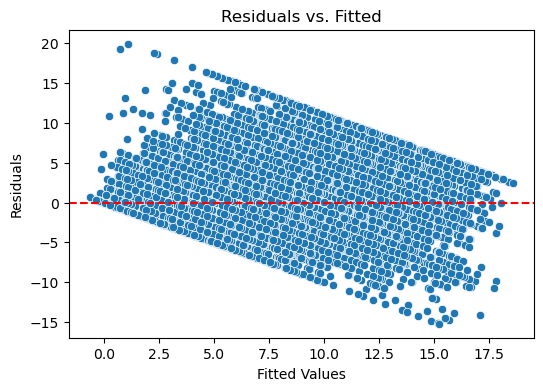

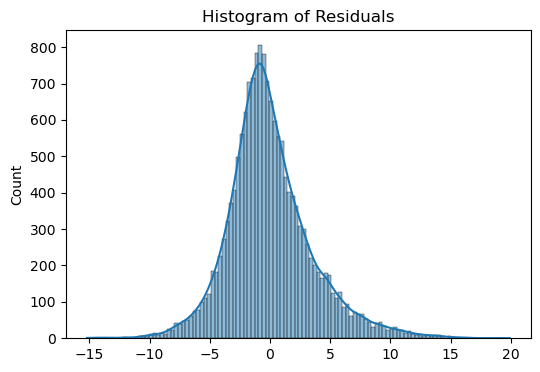

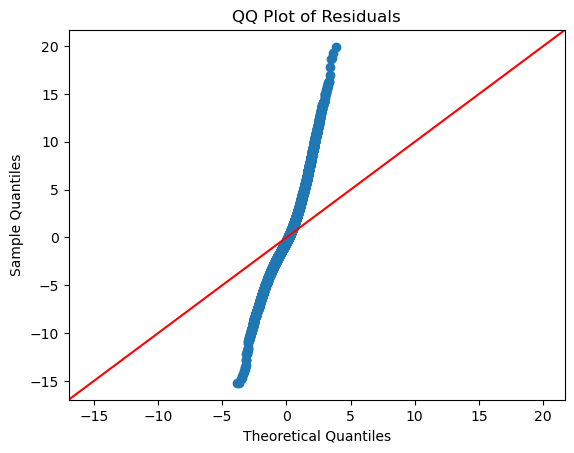

In [72]:
# 1. Prepare y (ensure numeric)
y = pd.to_numeric(gad7['GAD7_Round3'], errors='coerce')

# 2. Prepare X (drop columns)
X = full.drop(columns=['SID', 'GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x',
  'insomniaEfficacyMeasure_Round3',
 'insomniaEfficacyMeasure_Round4',
 'insomniaEfficacyMeasure_Round5',
 'insomniaEfficacyMeasure_Round6',
 'insomniaEfficacyMeasure_Round7',
 'insomniaEfficacyMeasure_Round8',
 'insomniaEfficacyMeasure_Round9',
 'insomniaEfficacyMeasure_Round10',
 'insomniaEfficacyMeasure_Round11',
 'insomniaEfficacyMeasure_Round12',
 'insomniaEfficacyMeasure_Round13','insomniaEfficacyMeasure_Round1_x','GAD7_Round1_x'])


# 3. Align X and y FIRST before any modeling
data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='GAD7_Round3')
y = data['GAD7_Round3']

# Fit model (use your cleaned X and y)
model = sm.OLS(y, X).fit()

y_pred = model.predict(X)
residuals = y.to_numpy().ravel() - y_pred.to_numpy().ravel()

y_pred = y_pred.to_numpy().ravel()



# Residuals vs Fitted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.show()

# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

# QQ Plot
sm.qqplot(residuals, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

Removing variables with high multicollinearity

In [83]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = full.drop(columns=['SID', 'GAD7_Round3', 'GAD7_Round2','EQ5D_Round2',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x',
 'insomniaEfficacyMeasure_Round2',
  'insomniaEfficacyMeasure_Round3',
 'insomniaEfficacyMeasure_Round4',
 'insomniaEfficacyMeasure_Round5',
 'insomniaEfficacyMeasure_Round6',
 'insomniaEfficacyMeasure_Round7',
 'insomniaEfficacyMeasure_Round8',
 'insomniaEfficacyMeasure_Round9',
 'insomniaEfficacyMeasure_Round10',
 'insomniaEfficacyMeasure_Round11',
 'insomniaEfficacyMeasure_Round12',
 'insomniaEfficacyMeasure_Round13','insomniaEfficacyMeasure_Round1_x','GAD7_Round1_x'])

y = eq5d['EQ5D_Round3']


data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='EQ5D_Round3')
y = data['EQ5D_Round3']


corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print(f"Variables to drop due to high collinearity: {to_drop}")

X_reduced = X.drop(columns=to_drop)


X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)


rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_train_preds = rf.predict(X_train)
rf_test_preds = rf.predict(X_test)


ols = LinearRegression()
ols.fit(X_train, y_train)
ols_train_preds = ols.predict(X_train)
ols_test_preds = ols.predict(X_test)


results = pd.DataFrame({
    'Model': ['Random Forest', 'Random Forest', 'OLS', 'OLS'],
    'Set': ['Train', 'Test', 'Train', 'Test'],
    'R_squared': [
        r2_score(y_train, rf_train_preds),
        r2_score(y_test, rf_test_preds),
        r2_score(y_train, ols_train_preds),
        r2_score(y_test, ols_test_preds)
    ],
    'MSE': [
        mean_squared_error(y_train, rf_train_preds),
        mean_squared_error(y_test, rf_test_preds),
        mean_squared_error(y_train, ols_train_preds),
        mean_squared_error(y_test, ols_test_preds)
    ]
})


print(results)


high_corr_pairs = (
    upper
    .where(upper > threshold)
    .stack()                        
    .reset_index()                  
)
high_corr_pairs.columns = ['Var_1', 'Var_2', 'Correlation']

print(high_corr_pairs)


Variables to drop due to high collinearity: [' Total_CBD (mg/g)', 'Camphene (PPM)', 'beta-Pinene (PPM)', 'gamma-Terpinene (PPM)', 'Humulene (PPM)']
           Model    Set  R_squared       MSE
0  Random Forest  Train   0.916563  0.005998
1  Random Forest   Test   0.425633  0.044765
2            OLS  Train   0.427073  0.041185
3            OLS   Test   0.426910  0.044666
                  Var_1                  Var_2  Correlation
0      Total_THC (mg/g)       Total_CBD (mg/g)     0.837396
1    alpha-Pinene (PPM)         Camphene (PPM)     0.823618
2    alpha-Pinene (PPM)      beta-Pinene (PPM)     0.916458
3        Camphene (PPM)      beta-Pinene (PPM)     0.817280
4  alfa-Terpinene (PPM)  gamma-Terpinene (PPM)     0.816656
5   Caryophyllene (PPM)         Humulene (PPM)     0.908339


In [84]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = full.drop(columns=['SID','GAD7_Round3','GAD7_Round2','EQ5D_Round2','insomniaEfficacyMeasure_Round2', 
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x',
  'insomniaEfficacyMeasure_Round3',
 'insomniaEfficacyMeasure_Round4',
 'insomniaEfficacyMeasure_Round5',
 'insomniaEfficacyMeasure_Round6',
 'insomniaEfficacyMeasure_Round7',
 'insomniaEfficacyMeasure_Round8',
 'insomniaEfficacyMeasure_Round9',
 'insomniaEfficacyMeasure_Round10',
 'insomniaEfficacyMeasure_Round11',
 'insomniaEfficacyMeasure_Round12',
 'insomniaEfficacyMeasure_Round13','insomniaEfficacyMeasure_Round1_x','GAD7_Round1_x'])

y = gad7['GAD7_Round3']


data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='GAD7_Round3')
y = data['GAD7_Round3']

corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print(f"Variables to drop due to high collinearity: {to_drop}")

X_reduced = X.drop(columns=to_drop)

X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

# random forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_train_preds = rf.predict(X_train)
rf_test_preds = rf.predict(X_test)

# OLS linear regression
ols = LinearRegression()
ols.fit(X_train, y_train)
ols_train_preds = ols.predict(X_train)
ols_test_preds = ols.predict(X_test)


results = pd.DataFrame({
    'Model': ['Random Forest', 'Random Forest', 'OLS', 'OLS'],
    'Set': ['Train', 'Test', 'Train', 'Test'],
    'R_squared': [
        r2_score(y_train, rf_train_preds),
        r2_score(y_test, rf_test_preds),
        r2_score(y_train, ols_train_preds),
        r2_score(y_test, ols_test_preds)
    ],
    'MSE': [
        mean_squared_error(y_train, rf_train_preds),
        mean_squared_error(y_test, rf_test_preds),
        mean_squared_error(y_train, ols_train_preds),
        mean_squared_error(y_test, ols_test_preds)
    ]
})

print(results)

high_corr_pairs = (
    upper
    .where(upper > threshold)
    .stack()                        
    .reset_index()                  
)
high_corr_pairs.columns = ['Var_1', 'Var_2', 'Correlation']

print(high_corr_pairs)



Variables to drop due to high collinearity: [' Total_CBD (mg/g)', 'Camphene (PPM)', 'beta-Pinene (PPM)', 'gamma-Terpinene (PPM)', 'Humulene (PPM)']
           Model    Set  R_squared        MSE
0  Random Forest  Train   0.894823   2.779064
1  Random Forest   Test   0.261247  19.775797
2            OLS  Train   0.280678  19.006519
3            OLS   Test   0.274523  19.420428
                  Var_1                  Var_2  Correlation
0      Total_THC (mg/g)       Total_CBD (mg/g)     0.837488
1    alpha-Pinene (PPM)         Camphene (PPM)     0.823670
2    alpha-Pinene (PPM)      beta-Pinene (PPM)     0.916626
3        Camphene (PPM)      beta-Pinene (PPM)     0.817421
4  alfa-Terpinene (PPM)  gamma-Terpinene (PPM)     0.817059
5   Caryophyllene (PPM)         Humulene (PPM)     0.908393


Penalised Regression

In [85]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X = full.drop(columns=['SID','GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x',
  'insomniaEfficacyMeasure_Round3',
 'insomniaEfficacyMeasure_Round4',
 'insomniaEfficacyMeasure_Round5',
 'insomniaEfficacyMeasure_Round6',
 'insomniaEfficacyMeasure_Round7',
 'insomniaEfficacyMeasure_Round8',
 'insomniaEfficacyMeasure_Round9',
 'insomniaEfficacyMeasure_Round10',
 'insomniaEfficacyMeasure_Round11',
 'insomniaEfficacyMeasure_Round12',
 'insomniaEfficacyMeasure_Round13','insomniaEfficacyMeasure_Round1_x','GAD7_Round1_x'])
y = full['EQ5D_Round3']


data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='EQ5D_Round3')
y = data['EQ5D_Round3']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5)
ridge.fit(X_train_scaled, y_train)
ridge_train_preds = ridge.predict(X_train_scaled)
ridge_test_preds = ridge.predict(X_test_scaled)

lasso = LassoCV(alphas=np.logspace(-3, 3, 50), cv=5, random_state=42, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
lasso_train_preds = lasso.predict(X_train_scaled)
lasso_test_preds = lasso.predict(X_test_scaled)

penalised_results = pd.DataFrame({
    'Model': ['Ridge', 'Ridge', 'Lasso', 'Lasso'],
    'Set': ['Train', 'Test', 'Train', 'Test'],
    'R_squared': [
        r2_score(y_train, ridge_train_preds),
        r2_score(y_test, ridge_test_preds),
        r2_score(y_train, lasso_train_preds),
        r2_score(y_test, lasso_test_preds)
    ],
    'MSE': [
        mean_squared_error(y_train, ridge_train_preds),
        mean_squared_error(y_test, ridge_test_preds),
        mean_squared_error(y_train, lasso_train_preds),
        mean_squared_error(y_test, lasso_test_preds)
    ],
    'Alpha': [
        ridge.alpha_, ridge.alpha_,
        lasso.alpha_, lasso.alpha_
    ]
})

print(penalised_results)


   Model    Set  R_squared       MSE       Alpha
0  Ridge  Train   0.607775  0.029032  244.205309
1  Ridge   Test   0.568175  0.030075  244.205309
2  Lasso  Train   0.606169  0.029151    0.001326
3  Lasso   Test   0.570381  0.029921    0.001326


In [86]:
feature_names = X_train.columns

# 2. build Series of coefficients
ridge_coefs = pd.Series(ridge.coef_, index=feature_names)
lasso_coefs = pd.Series(lasso.coef_, index=feature_names)

# 3. sort by absolute value
ridge_top = ridge_coefs.reindex(ridge_coefs.abs().sort_values(ascending=False).index)
lasso_top = lasso_coefs.reindex(lasso_coefs.abs().sort_values(ascending=False).index)

# 4. pick the top N (e.g. top 10)
N = 10
print("Top 10 Ridge predictors:")
print(ridge_top.head(N))

print("\nTop 10 Lasso predictors:")
print(lasso_top.head(N))

Top 10 Ridge predictors:
EQ5D_Round2                       0.130784
EQ5D_Round1                       0.067890
GAD7_Round2                      -0.017938
insomniaEfficacyMeasure_Round2    0.014427
occupation                        0.013947
diag_Chronic pain                -0.013324
diag_Fibromyalgia                -0.010141
GAD7_Round1                       0.008842
diag_Multiple sclerosis          -0.007851
Age                              -0.006300
dtype: float64

Top 10 Lasso predictors:
EQ5D_Round2                       0.137669
EQ5D_Round1                       0.067152
GAD7_Round2                      -0.013330
insomniaEfficacyMeasure_Round2    0.012730
occupation                        0.012545
diag_Chronic pain                -0.009236
GAD7_Round1                       0.007965
diag_Fibromyalgia                -0.006760
Age                              -0.005957
diag_Depression                   0.005174
dtype: float64


In [89]:
y_train.head()

,EQ5D_Round2,EQ5D_Round2
18599,0.768,0.768
8125,0.837,0.837
5462,0.332,0.332
6442,0.837,0.837
14955,0.770,0.770


In [87]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X = full.drop(columns=['SID','GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x',
  'insomniaEfficacyMeasure_Round3',
 'insomniaEfficacyMeasure_Round4',
 'insomniaEfficacyMeasure_Round5',
 'insomniaEfficacyMeasure_Round6',
 'insomniaEfficacyMeasure_Round7',
 'insomniaEfficacyMeasure_Round8',
 'insomniaEfficacyMeasure_Round9',
 'insomniaEfficacyMeasure_Round10',
 'insomniaEfficacyMeasure_Round11',
 'insomniaEfficacyMeasure_Round12',
 'insomniaEfficacyMeasure_Round13','insomniaEfficacyMeasure_Round1_x','GAD7_Round1_x'])
y = full['GAD7_Round3']

data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='GAD7_Round3')
y = data['GAD7_Round3']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5)
ridge.fit(X_train_scaled, y_train)
ridge_train_preds = ridge.predict(X_train_scaled)
ridge_test_preds = ridge.predict(X_test_scaled)

lasso = LassoCV(alphas=np.logspace(-3, 3, 50), cv=5, random_state=42, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
lasso_train_preds = lasso.predict(X_train_scaled)
lasso_test_preds = lasso.predict(X_test_scaled)

penalised_results = pd.DataFrame({
    'Model': ['Ridge', 'Ridge', 'Lasso', 'Lasso'],
    'Set': ['Train', 'Test', 'Train', 'Test'],
    'R_squared': [
        r2_score(y_train, ridge_train_preds),
        r2_score(y_test, ridge_test_preds),
        r2_score(y_train, lasso_train_preds),
        r2_score(y_test, lasso_test_preds)
    ],
    'MSE': [
        mean_squared_error(y_train, ridge_train_preds),
        mean_squared_error(y_test, ridge_test_preds),
        mean_squared_error(y_train, lasso_train_preds),
        mean_squared_error(y_test, lasso_test_preds)
    ],
    'Alpha': [
        ridge.alpha_, ridge.alpha_,
        lasso.alpha_, lasso.alpha_
    ]
})

print(penalised_results)


   Model    Set  R_squared        MSE       Alpha
0  Ridge  Train   0.527620  12.392297  244.205309
1  Ridge   Test   0.519926  13.239539  244.205309
2  Lasso  Train   0.525728  12.441948    0.029471
3  Lasso   Test   0.522121  13.179008    0.029471


In [88]:
feature_names = X_train.columns

# 2. build Series of coefficients
ridge_coefs = pd.Series(ridge.coef_, index=feature_names)
lasso_coefs = pd.Series(lasso.coef_, index=feature_names)

# 3. sort by absolute value
ridge_top = ridge_coefs.reindex(ridge_coefs.abs().sort_values(ascending=False).index)
lasso_top = lasso_coefs.reindex(lasso_coefs.abs().sort_values(ascending=False).index)

# 4. pick the top N (e.g. top 10)
N = 10
print("Top 10 Ridge predictors:")
print(ridge_top.head(N))

print("\nTop 10 Lasso predictors:")
print(lasso_top.head(N))

Top 10 Ridge predictors:
GAD7_Round2                       2.509301
GAD7_Round1                       0.949887
EQ5D_Round2                      -0.523646
insomniaEfficacyMeasure_Round2   -0.383217
occupation                       -0.190115
Depression_or_anxiety             0.150390
diag_PTSD                         0.138262
Humulene (PPM)                   -0.122473
insomniaEfficacyMeasure_Round1    0.122011
Camphene (PPM)                   -0.111329
dtype: float64

Top 10 Lasso predictors:
GAD7_Round2                       2.594896
GAD7_Round1                       0.906616
EQ5D_Round2                      -0.500634
insomniaEfficacyMeasure_Round2   -0.324443
occupation                       -0.171609
Depression_or_anxiety             0.111571
diag_PTSD                         0.095757
form_Pastilles                   -0.073232
Product_Prescription_ID3         -0.072495
diag_OCD                          0.060767
dtype: float64


Ordinal Regression for GAD7

In [34]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

X = gad7.drop(columns=[
    'SID',
    'GAD7_Round3', 'GAD7_Round4', 'GAD7_Round5',
    'GAD7_Round6', 'GAD7_Round7', 'GAD7_Round8', 'GAD7_Round9',
    'GAD7_Round10', 'GAD7_Round11', 'GAD7_Round12', 'GAD7_Round13',
    'EQ5D_Round3', 'EQ5D_Round4', 'EQ5D_Round5', 'EQ5D_Round6'
])
y = gad7['GAD7_Round3']

data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='GAD7_Round3')
y = data['GAD7_Round3']

model = OrderedModel(
    endog=y,
    exog=X,
    distr='logit'  # 'logit' = ordinal logistic, 'probit' = ordinal probit
)

result = model.fit(method='bfgs')

print(result.summary())

pred_probs = result.predict(X)
print(pred_probs.head())

c:\Users\abbyh\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)


         Current function value: 2.455958
         Iterations: 500
         Function evaluations: 510
         Gradient evaluations: 510
                             OrderedModel Results                             
Dep. Variable:            GAD7_Round3   Log-Likelihood:                -40054.
Model:                   OrderedModel   AIC:                         8.036e+04
Method:            Maximum Likelihood   BIC:                         8.134e+04
Date:                Sun, 29 Jun 2025                                         
Time:                        18:12:18                                         
No. Observations:               16309                                         
Df Residuals:                   16182                                         
Df Model:                         106                                         
                                                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

c:\Users\abbyh\anaconda3\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\Users\abbyh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [35]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit on training data
model = OrderedModel(
    endog=y_train,
    exog=X_train,
    distr='logit'
)
result = model.fit(method='bfgs')

# Predict on test data
pred_probs_test = result.predict(X_test)
pred_class_test = pred_probs_test.idxmax(axis=1)

# Evaluate
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, pred_class_test)
print(f"Test set accuracy: {acc:.3f}")



Optimization terminated successfully.
         Current function value: 2.449070
         Iterations: 424
         Function evaluations: 432
         Gradient evaluations: 432
Test set accuracy: 0.200


c:\Users\abbyh\anaconda3\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [36]:
# Mean absolute error
mae = np.mean(np.abs(y_test - pred_class_test))
print(f"Test MAE: {mae:.2f}")

# Accuracy within ±1
acc_within1 = np.mean(np.abs(y_test - pred_class_test) <= 1)
print(f"Accuracy within ±1: {acc_within1:.2f}")

# Accuracy within ±2
acc_within2 = np.mean(np.abs(y_test - pred_class_test) <= 2)
print(f"Accuracy within ±2: {acc_within2:.2f}")

Test MAE: 3.03
Accuracy within ±1: 0.39
Accuracy within ±2: 0.55


In [37]:
## Reducing High Collinearity var


X = gad7.drop(columns=[
    'SID',
    'GAD7_Round3', 'GAD7_Round4', 'GAD7_Round5',
    'GAD7_Round6', 'GAD7_Round7', 'GAD7_Round8', 'GAD7_Round9',
    'GAD7_Round10', 'GAD7_Round11', 'GAD7_Round12', 'GAD7_Round13',
    'EQ5D_Round3', 'EQ5D_Round4', 'EQ5D_Round5', 'EQ5D_Round6'
])
y = gad7['GAD7_Round3']


data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='GAD7_Round3')
y = data['GAD7_Round3']

corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print(f"Variables to drop due to high collinearity: {to_drop}")

X_reduced = X.drop(columns=to_drop)

X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

# Fit on training data
model = OrderedModel(
    endog=y_train,
    exog=X_train,
    distr='logit'
)
result = model.fit(method='bfgs')

# Predict on test data
pred_probs_test = result.predict(X_test)
pred_class_test = pred_probs_test.idxmax(axis=1)

# Evaluate
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, pred_class_test)
print(f"Test set accuracy: {acc:.3f}")


# Mean absolute error
mae = np.mean(np.abs(y_test - pred_class_test))
print(f"Test MAE: {mae:.2f}")

# Accuracy within ±1
acc_within1 = np.mean(np.abs(y_test - pred_class_test) <= 1)
print(f"Accuracy within ±1: {acc_within1:.2f}")

# Accuracy within ±2
acc_within2 = np.mean(np.abs(y_test - pred_class_test) <= 2)
print(f"Accuracy within ±2: {acc_within2:.2f}")

Variables to drop due to high collinearity: [' Total_CBD (mg/g)', 'Camphene (PPM)', 'beta-Pinene (PPM)', 'gamma-Terpinene (PPM)', 'Humulene (PPM)', 'GAD7_Round1']
Optimization terminated successfully.
         Current function value: 2.449322
         Iterations: 419
         Function evaluations: 429
         Gradient evaluations: 429
Test set accuracy: 0.200
Test MAE: 3.02
Accuracy within ±1: 0.39
Accuracy within ±2: 0.55


In [101]:
print(y.min(), y.max())

0.0 21.0


Neural Network

In [38]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split


eq5d_predictors = gad7.drop(columns=['SID','GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
 'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x'])
y = eq5d['EQ5D_Round3']


data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='EQ5D_Round3')
y = data['EQ5D_Round3']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(max_iter=1000, random_state=42,
                         early_stopping=True,       
                         validation_fraction=0.1,   
                         n_iter_no_change=10))      
])


param_grid = {
    'mlp__hidden_layer_sizes':[
    (100,50), (100,50,25),
    (200,100,50),
    (200,100,50,25)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [1e-5, 1e-4, 1e-3],    
    'mlp__learning_rate_init': [1e-3, 1e-2]
}


gs = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
gs.fit(X_train, y_train)

print("Best params:", gs.best_params_)
print("Train R²:", gs.score(X_train, y_train))
print("Test  R²:", gs.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
y_train_pred = gs.predict(X_train)
y_test_pred  = gs.predict(X_test)

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test  MSE: ", mean_squared_error(y_test,  y_test_pred))


Best params: {'mlp__activation': 'relu', 'mlp__alpha': 1e-05, 'mlp__hidden_layer_sizes': (200, 100, 50, 25), 'mlp__learning_rate_init': 0.01}
Train R²: 0.6111421221410753
Test  R²: 0.5483556742942575
Train MSE: 0.028506621707312572
Test  MSE:  0.032768842148228915


Train MSE: 0.037582328435232355
Test  MSE:  0.04402744219854004


In [16]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from scipy.stats import loguniform
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def sample_hidden_layer_sizes(n_iter, min_layers=1, max_layers=8, min_units=50, max_units=300, random_state=None):

    rng = np.random.default_rng(random_state)
    sizes = set()
    while len(sizes) < n_iter:
        # Sample number of layers
        n_layers = rng.integers(min_layers, max_layers + 1)
        # Sample units for each layer
        units = tuple(rng.integers(min_units, max_units + 1, size=n_layers).tolist())
        sizes.add(units)
    return list(sizes)


hidden_layer_candidates = sample_hidden_layer_sizes(n_iter=50, random_state=42)


param_dist = {
    'mlp__hidden_layer_sizes': hidden_layer_candidates,
    'mlp__alpha': loguniform(1e-5, 1e-2),
    'mlp__learning_rate_init': loguniform(1e-4, 1e-1),
    'mlp__activation': ['relu', 'tanh']
}

# 3. Build the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(
        max_iter=500,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10
    ))
])


rs = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)


rs.fit(X_train, y_train)
print("Best params:", rs.best_params_)
print("Train R²:", rs.score(X_train, y_train))
print("Test  R²:", rs.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
y_train_pred = gs.predict(X_train)
y_test_pred  = gs.predict(X_test)

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test  MSE: ", mean_squared_error(y_test,  y_test_pred))

Best params: {'mlp__activation': 'relu', 'mlp__alpha': 1.667761543019792e-05, 'mlp__hidden_layer_sizes': (88, 174, 224, 174, 161, 91, 145, 109), 'mlp__learning_rate_init': 0.008979064194712979}
Train R²: 0.4611891759677381
Test  R²: 0.426247106003356
Train MSE: 0.037582328435232355
Test  MSE:  0.04402744219854004


In [17]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

base_models = [
    ('ols',      LinearRegression()),
    ('ridge',    RidgeCV(alphas=[1e-3,1e-2,1e-1,1])),
    ('rf',       RandomForestRegressor(n_estimators=200, max_depth=20)),
    ('mlp',      MLPRegressor(hidden_layer_sizes=(88, 174, 224, 174, 161, 91, 145, 109), max_iter=500))
]

stack = StackingRegressor(
    estimators=base_models,
    final_estimator=RidgeCV(alphas=[1e-3,1e-2,1e-1,1]),
    cv=5, n_jobs=-1
)

stack.fit(X_train, y_train)
print("Stacked Test  R²:", stack.score(X_test, y_test))


Stacked Test  R²: 0.45265593001043825


In [18]:
y_train_pred = stack.predict(X_train)
y_test_pred  = stack.predict(X_test)

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test  MSE: ", mean_squared_error(y_test,  y_test_pred))

Train MSE: 0.024982102664756235
Test  MSE:  0.04071753421300254


In [22]:
X = gad7.drop(columns=[
    'SID', 'EQ5D_Round2',
    'GAD7_Round2', 'GAD7_Round3', 'GAD7_Round4', 'GAD7_Round5',
    'GAD7_Round6', 'GAD7_Round7', 'GAD7_Round8', 'GAD7_Round9',
    'GAD7_Round10', 'GAD7_Round11', 'GAD7_Round12', 'GAD7_Round13',
    'EQ5D_Round3', 'EQ5D_Round4', 'EQ5D_Round5', 'EQ5D_Round6', 'GAD7_Round1_x'
])
y = gad7['GAD7_Round2']

data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='GAD7_Round2')
y = data['GAD7_Round2']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(max_iter=1000, random_state=42,
                         early_stopping=True,       
                         validation_fraction=0.1,   
                         n_iter_no_change=10))      
])


param_grid = {
    'mlp__hidden_layer_sizes':[
    (100,50), (100,50,25),
    (200,100,50),
    (200,100,50,25)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [1e-5, 1e-4, 1e-3],    
    'mlp__learning_rate_init': [1e-3, 1e-2]
}


gs = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
gs.fit(X_train, y_train)

print("Best params:", gs.best_params_)
print("Train R²:", gs.score(X_train, y_train))
print("Test  R²:", gs.score(X_test, y_test))

y_train_pred = gs.predict(X_train)
y_test_pred  = gs.predict(X_test)

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test  MSE: ", mean_squared_error(y_test,  y_test_pred))

Best params: {'mlp__activation': 'relu', 'mlp__alpha': 1e-05, 'mlp__hidden_layer_sizes': (100, 50), 'mlp__learning_rate_init': 0.001}
Train R²: 0.3476819835097036
Test  R²: 0.27381407151283244
Train MSE: 18.789082475511528
Test  MSE:  20.987030280375198


In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from scipy.stats import loguniform
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X = gad7.drop(columns=[
    'SID', 'EQ5D_Round2',
    'GAD7_Round2', 'GAD7_Round3', 'GAD7_Round4', 'GAD7_Round5',
    'GAD7_Round6', 'GAD7_Round7', 'GAD7_Round8', 'GAD7_Round9',
    'GAD7_Round10', 'GAD7_Round11', 'GAD7_Round12', 'GAD7_Round13',
    'EQ5D_Round3', 'EQ5D_Round4', 'EQ5D_Round5', 'EQ5D_Round6', 'GAD7_Round1_x'
])
y = gad7['GAD7_Round2']

data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='GAD7_Round2')
y = data['GAD7_Round2']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

def sample_hidden_layer_sizes(n_iter, min_layers=1, max_layers=8, min_units=50, max_units=300, random_state=None):

    rng = np.random.default_rng(random_state)
    sizes = set()
    while len(sizes) < n_iter:
        # Sample number of layers
        n_layers = rng.integers(min_layers, max_layers + 1)
        # Sample units for each layer
        units = tuple(rng.integers(min_units, max_units + 1, size=n_layers).tolist())
        sizes.add(units)
    return list(sizes)


hidden_layer_candidates = sample_hidden_layer_sizes(n_iter=50, random_state=42)


param_dist = {
    'mlp__hidden_layer_sizes': hidden_layer_candidates,
    'mlp__alpha': loguniform(1e-5, 1e-2),
    'mlp__learning_rate_init': loguniform(1e-4, 1e-1),
    'mlp__activation': ['relu', 'tanh']
}

# 3. Build the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(
        max_iter=500,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10
    ))
])


rs = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)


rs.fit(X_train, y_train)
print("Best params:", rs.best_params_)
print("Train R²:", rs.score(X_train, y_train))
print("Test  R²:", rs.score(X_test, y_test))



Best params: {'mlp__activation': 'relu', 'mlp__alpha': 0.0006173770394704573, 'mlp__hidden_layer_sizes': (108,), 'mlp__learning_rate_init': 0.0001994916615063395}
Train R²: 0.33508580734537197
Test  R²: 0.28737167184067924
Train MSE: 18.789082475511528
Test  MSE:  20.987030280375198


In [24]:
from sklearn.metrics import mean_squared_error
y_train_pred = rs.predict(X_train)
y_test_pred  = rs.predict(X_test)

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test  MSE: ", mean_squared_error(y_test,  y_test_pred))

Train MSE: 19.15189721746986
Test  MSE:  20.59521083380109


Round 3 Prediction

In [20]:
df=eq5d.drop(['SID', 'EQ5D_Round4','EQ5D_Round5', 'EQ5D_Round6'], axis=1)
df= df[df['EQ5D_Round2'].notnull()] 
df= df[df['EQ5D_Round3'].notnull()] 

X=df.drop(columns=['EQ5D_Round3'])
y=df['EQ5D_Round3']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(max_iter=1000, random_state=42,
                         early_stopping=True,       
                         validation_fraction=0.1,   
                         n_iter_no_change=10))      
])


param_grid = {
    'mlp__hidden_layer_sizes':[
    (100,50), (100,50,25),
    (200,100,50),
    (200,100,50,25)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [1e-5, 1e-4, 1e-3],    
    'mlp__learning_rate_init': [1e-3, 1e-2]
}


gs = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
gs.fit(X_train, y_train)

print("Best params:", gs.best_params_)
print("Train R²:", gs.score(X_train, y_train))
print("Test  R²:", gs.score(X_test, y_test))

Best params: {'mlp__activation': 'relu', 'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (100, 50, 25), 'mlp__learning_rate_init': 0.01}
Train R²: 0.6375255936032201
Test  R²: 0.5559698566603206


In [21]:
y_train_pred = gs.predict(X_train)
y_test_pred  = gs.predict(X_test)

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test  MSE: ", mean_squared_error(y_test,  y_test_pred))

Train MSE: 0.02627232633734116
Test  MSE:  0.033623989963056836


In [25]:
## Random Search

df=eq5d.drop(['SID', 'EQ5D_Round4','EQ5D_Round5', 'EQ5D_Round6'], axis=1)
df= df[df['EQ5D_Round2'].notnull()] 
df= df[df['EQ5D_Round3'].notnull()] 

X=df.drop(columns=['EQ5D_Round3'])
y=df['EQ5D_Round3']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


def sample_hidden_layer_sizes(n_iter, min_layers=1, max_layers=8, min_units=50, max_units=300, random_state=None):

    rng = np.random.default_rng(random_state)
    sizes = set()
    while len(sizes) < n_iter:
        # Sample number of layers
        n_layers = rng.integers(min_layers, max_layers + 1)
        # Sample units for each layer
        units = tuple(rng.integers(min_units, max_units + 1, size=n_layers).tolist())
        sizes.add(units)
    return list(sizes)


hidden_layer_candidates = sample_hidden_layer_sizes(n_iter=50, random_state=42)


param_dist = {
    'mlp__hidden_layer_sizes': hidden_layer_candidates,
    'mlp__alpha': loguniform(1e-5, 1e-2),
    'mlp__learning_rate_init': loguniform(1e-4, 1e-1),
    'mlp__activation': ['relu', 'tanh']
}

# 3. Build the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(
        max_iter=500,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10
    ))
])


rs = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)


rs.fit(X_train, y_train)
print("Best params:", rs.best_params_)
print("Train R²:", rs.score(X_train, y_train))
print("Test  R²:", rs.score(X_test, y_test))

y_train_pred = rs.predict(X_train)
y_test_pred  = rs.predict(X_test)

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test  MSE: ", mean_squared_error(y_test,  y_test_pred))

Best params: {'mlp__activation': 'relu', 'mlp__alpha': 1.667761543019792e-05, 'mlp__hidden_layer_sizes': (88, 174, 224, 174, 161, 91, 145, 109), 'mlp__learning_rate_init': 0.008979064194712979}
Train R²: 0.6292159748037298
Test  R²: 0.5650989873421985
Train MSE: 0.02687461166559173
Test  MSE:  0.03293269050282159
